In [1]:
from epyc import JSONLabNotebook
import epydemic
import numpy as np
import pandas as pd
from epydemic import SEIR, Monitor
import string
from parameters import *

# Read gathered data and create dataframes.

In [2]:
json_lab_1 = JSONLabNotebook(get_out_path("ex_1_seir"), create=False)
json_lab_2 = JSONLabNotebook(get_out_path("ex_2_seir"), create=False)

In [3]:
dfs_1 = [json_lab_1.dataframe(tag=rs) for rs in json_lab_1.resultSets()]
dfs_2 = [json_lab_2.dataframe(tag=rs) for rs in json_lab_2.resultSets()]
dfs = dfs_1 + dfs_2

# Concatenate dataframes to combine all simulations.
df = pd.concat(dfs)

## Get the outbreak size for all simulations at the defualt timeout and at equilibrium.

In [4]:
# Creat columns for the outbreak size for all simulations at the defualt timeout and at equilibrium as a fraction of the total population
er_sss_SEIR_1 = np.array(df[Monitor.timeSeriesForLocus(epydemic.SEIR.REMOVED)].values)
df["R-Timeout"] = np.array([s[1] for s in er_sss_SEIR_1]) / n
df["R-Equilibrium"] = df[SEIR.REMOVED] / n

In [5]:
# Create a dataframe to hold information on underveloped simulations at the default timeout.
df_eq = df[df["R-Timeout"] != df["R-Equilibrium"]]

In [6]:
plt.rc('xtick', labelsize=18)    
plt.rc('ytick', labelsize=18)    

## Create a parallel coordinates plot to illustate the progression in outbreak size for all underdeveloped simulations from the defualt timeout to equilibrium.

/tmp/ipykernel_346803/1594394937.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eq["to_eq"] = df_eq[["R-Timeout", "R-Equilibrium"]].values.tolist()
/tmp/ipykernel_346803/1594394937.py:40: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


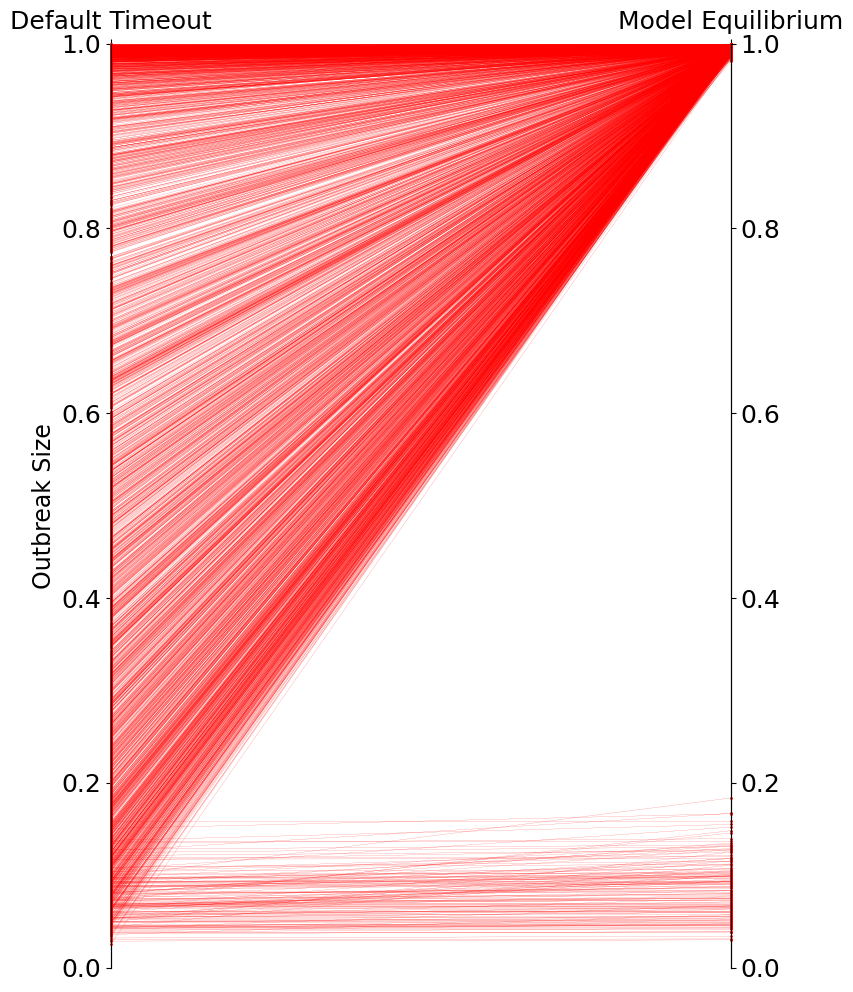

In [7]:
_ = plt.show()
fig, ax1 = plt.subplots(figsize=(8, 12))

ax2 = ax1.twinx()

x = [0, 1]
y = [0, 1]

# Set Plot Limits and Ticks
ax1.set_ylim(y)
ax2.set_ylim(y)
ax1.set_xlim(x)
ax1.set_xticks(x)
ax2.set_yticks((0, 1))

# Set Plot Labels
ax1.set_xticklabels(["Default Timeout", "Model Equilibrium"])
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax2.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

ax1.set_ylabel('Outbreak Size')

# Hide axis spines
ax1.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ticks = np.linspace(0, 1, 6)
ax2.set_yticks(ticks)

# Plot Data
df_eq["to_eq"] = df_eq[["R-Timeout", "R-Equilibrium"]].values.tolist()
res = df_eq["to_eq"].sample(int(len(df_eq) * 1)).reset_index()

for i in range(len(res)):
    if res["to_eq"][i][0] != res["to_eq"][i][1]:
        ax1.plot(x, res["to_eq"][i], 'r', marker=".", markersize=2, zorder=10, clip_on=False, linewidth=0.1)

fig.show()